# 기본모듈로드
import  pandas  as  pd 
import  numpy  as  np 
import  matplotlib.pyplot  as  plt 
% matplotlib  inline #결과물을 브라우저에 바로 보여주는 명령어

# Pandas의 표시에 관한 기본 설정
pd.options.display.max_columns = None	항상 모든 열 (컬럼)을 표시
pd.set_option('display.max_columns', None)	항상 모든 열 (컬럼)을 표시
pd.options.display.max_rows = 10	항상 10 행만 표시
pd.options.display.precision = 2	표시 용의 자릿수를 2로
pd.options.display.notebook_repr_html = True	데이터 프레임을 HTML로 깨끗하게 표시

# Pandas 데이터 객체
pd.Series	인덱스의 1 차원 데이터 (시리즈)
pd.DataFrame	인덱싱 된 2 차원 데이터 (데이터 프레임)
pd.Panel	인덱싱 된 3 차원 데이터 (패널)

# 데이터 I / O
pd.read_csv('foo.csv', header=0)	CSV 파일에서 가져 오기
df.to_csv('bar.csv', index=False)	CSV 파일로 내보내기
pd.read_excel('foo.xlsx', sheetname='Sheet1')	엑셀 파일에서로드
df.to_excel('bar.xlsx', sheet_name='Sheet1')	엑셀 파일로 내보내기
pd.read_hdf('foo.h5','df')	HDF5 파일에서로드
df.to_hdf('bar.h5','df')	HDF5 파일로 내보내기

# 데이터프레임 표시
df.head()	처음 5 개 행을 표시
df.tail()	마지막 5 행을 표시

# 인덱스 컬럼 값
df.index	인덱스를 가져옵니다
df.columns	컬럼 이름을 검색
df.values	값을 numpy.ndarray 취득

# 기본정보확인
df.info()	"유효 데이터 수" "데이터 형식" "메모리 사용량"등의 종합적인 정보를 표시
df.shape	화면의 형태를 조사
df.count()	각 컬럼의 유효 데이터 수를 표시
df.dtypes	각 컬럼의 데이터 유형을 표시
len(df) - df.count()	모든 컬럼에 대해 결 측값의 수를 계산

# 각종통계
df.describe()	숫자 데이터에 대해 각종 통계를 계산
df.describe(include='all')	모든 데이터에 대해 각종 통계를 계산

# 데이터선택

열선택

df['Age']	Age 시리즈로서 취득 (키워드 액세스)
df.Age	Age 시리즈로서 취득 (도트 액세스)

인덱스 컬럼의 동시 선택

df[['Age', 'Name']][1:3]	위치 번호 [1, 2]의 Age와 Name 컬럼을 취득
df.iloc[1:3, [0, 4]]	위치 번호 [1, 2]or 부울 목록
df.loc[1:3, ['Age', 'Height']]	인덱스 이름 [1, 2, 3]or 부울 목록
df.ix[1:3, ['Age', 'Height']]	인덱스 이름 or 위치 번호 or 부울 목록
df.iat[0, 1]	위치 번호 고속 요소 액세스
df.at[1, 'Age']	인덱스 이름을 사용한 신속한 요소 액세스

부울 인덱스에 의한 선택

df[df.Age >= 70]	Age가 70 이상인 사람을 선택
df[df > 0]	0 위의 요소는 그대로 반환하고, 그렇지는 NaN
df.where(df > 0)	0 위의 요소는 그대로 반환하고, 그렇지는 NaN
df.mask(df > 0)	0 위의 요소를 NaN로 마스크, 그렇지 않으면 그대로 반환
df.ix[:, df.columns.map(lambda x: x.startswith('A'))]	A라는 문자로 시작하는 라인을 취득
df[df['Grade'].isin(['A', 'B'])]	Grade 값이 A 또는 B의 행만 반환
df.ix[:, ~df.columns.isin(['Age', 'Height'])]	Age 및 Height 이외의 열을 모두 반환

# 데이터의 조작

기본조작

df.T	데이터 프레임의 전치
s.any()	하나라도 참이면 True
s.all()	모든 참이면 True
s.astype('float64')	데이터 형식 변환
s.map({'Female':0, 'Male':1, })	사전을 이용한 값의 변환
s.value_counts()	값의 빈도를 계산
pd.get_dummies(df['Club'])	카테고리 변수를 one-hot 벡터로 변환

인덱스 관련

df.index = df.pop('UserId')	'UserId'라는 컬럼을 인덱스로 사용
df.reset_index(drop=True)	인덱스의 모습 치유

정렬

df.sort_index(axis=1, ascending=True)	인덱스에 의한 정렬
df.sort_values(by='Age', ascending=False)	값으로 정렬

복사

수정 된 데이터 프레임을 할당 
df2  =  df . sort_values ( by = 'Age' )

복사 한 데이터 프레임 자체를 변경 
df2  =  df . copy () 
df2 . sort_values ( by = 'Age' ,  inplace = True )

열 추가

df [ 'AB' ]  =  df [ 'A' ]  +  df [ 'B' ]
또는
df . loc [:,  'AB' ]  =  df [ 'A' ]  +  df [ 'B' ]

# 결 측값 처리
(pandas 보통 np.nan에서 결 측값을 표현. 이러한 결 측값은 계산시에는 기본적으로 무시된다.)

df.dropna()	결손치가 하나라도 포함되면 행을 떨어 뜨린다
df.dropna(how='all')	모든 값이 결손되어 있으면, 행을 떨어 뜨린다
df.fillna(0)	결손치를 0으로 채운다
df.fillna(method='ffill')	이전 값으로 결 측값을 채우기

삭제

df.drop("Tmp", axis=1)	열 삭제
df.drop_duplicated()	중복 행 삭제

문자열 메소드

s.str.lower()	소문자로 변환
s.str.startswith('A')	A에서 시작하는지 확인
s.str.contains('^[Aa]')	정규식을 충족하는지 확인
s.str.strip()	양쪽의 공백을 제거

카테고리 관련

df['dcodes'] = df['d'].astype('category').cat.codes	카테고리마다 신규 ID 흔들기

데이터의 결합

pd.concat([df1, df2], axis=0)	행 방향으로 결합
df1.append(df2, ignore_index=True)	행 방향으로 결합. 인덱스는 다시 매.
df1.join(df2)	열 방향으로 결합
pd.merge(df_left, df_right, how='inner', on='key')	SQL 스타일의 병합

그룹화

Group by이라는 작업은 하나 이상의 다음의 단계를 포함

Split :있는 지표에 따라 데이터를 그룹으로 분할
Apply : 그룹에있는 함수를 적용
Combine : 결과를 정리하고 데이터 구조에 넣는다
    
df.groupby(['A', 'B']).sum()	그룹화 한 결과를 더하면
df.groupby(['A', 'B']).apply(lambda x: (x - x.mean()) / x.std())	그룹화 한 결과를 화이트닝
df.groupby(['A', 'B']).agg(['mean', 'std'])	그룹핑 한 결과의 평균과 표준 편차를 구하는
df.pivot_table(values='D', index=['A', 'B'], columns=['C'], aggfunc=np.mean)	피벗 테이블을 만들기

계층 인덱스

df.stack()	열에서 인덱스에
df.unstack()	인덱스에서 컬럼에

tuples  =  list ( zip ( * [[ 'bar' ,  'bar' ,  'baz' ,  'baz' ] 
                    [ 'one' ,  'two' ,  'one' ,  'two' ])) 
index  =  pd . MultiIndex . from_tuples ( tuples ,  names = [ 'first' ,  'second' ) 
df  =  pd . DataFrame ( np . random .randn( 4 ,  2 ),  index = index ,  columns = [ 'A' ,  'B' ])

df_stacked  =  df . stack () 
df_stacked . index . names  =  [ 'first' ,  'second' ,  'third' ]

# 시계열 데이터

시계열 데이터의 기본 처리

pd.date_range('20170101', periods=7)	2017 년 설날부터 7 일 타임 스탬프를 인덱스로 검색
pd.to_datetime(s)	s를 datetime으로 변환
ts.asfreq('5Min')	일정 주기로 명소 샘플링 (주기에서 값을 하나만 선택)
df[['A', 'B']]['2017-01-01':'2017-01-07']	2017 년 1 월 1 일부터 2017 년 1 월 7 일까지 A와 B에 대한 데이터를 얻을
ts.asfreq('1T').ffill(limit=3)	1 분마다 자리 샘플링하여 결 측값은 3 단계까지 채우기
ts.resample('5Min').mean()	일정 주기로 리샘플링 (주 기간의 값을 모두 사용하여 연산)
df['A'].resample('3T', how=['mean', 'std', 'count'])	3 분마다 리샘플링 된 데이터에 대해 각종 통계를 요구
ts.at_time(datetime.time(18, 30))	18시 30 분 데이터 만 가져. import datetime가정
ts.pct_change()	변화량 감지
ts.rolling(50).mean()	이동 평균

시간대

ts_utc = ts.tz_localize('UTC')	시간을 UTC (협정 세계시)에 맞추는
ts_utc.tz_convert('US/Eastern')	US / Eastern (동부 표준 시간)에 시간대를 변경
ts_utc.tz_convert('Japan')	일본 표준 시간으로 시간대를 변경

# DataFrame와 Series
pandas에는 DataFrame와 Series의 2 종류의 데이터 형식이있다. 전자는 이차원 데이터, 후자는 일차원 데이터이다. 기본적으로 Series는 사용할 수별로 없기 때문에 DataFrame을 중심으로 설명한다. DataFrame에서 하나의 column을 지정하여 검색 할 경우 그것은 Series 형이된다.
# DataFrame 
   foo   bar 
a     0     1 
b     2     3 
c     4     5

# Series 
a     0 
b     2 
c     4

# DataFrame 작업

index와 columns지정

df . columns  =  [ 'foo' ,  'bar' ] 
df . index  =  [ 'a' ,  'b' ,  'c' ]

index와 columns 이름 확인
df . columns 
df . index 
df . info ()

가장 간단한 열 추출

df [ 'foo' ]  or  df [ 0 ]   
df [ 'foo' ,  'bar' ]]  or  df [ 0 ,  1 ]]  

자세한 추출 (ix, iloc, loc)

DataFrame에서 요소의 위치 정보로서 행렬의 요소 번호 및 사용자 정의의 이름이 있다고 상술했다. 어디에서 꺼내 있는지를 명시하기 위해 ix, iloc, loc의 3 종류가있다. 
iloc는 번호의 지정에만 대응, loc은 이름 만 ix는 모두 지정 가능하다. 위의 예를 취할 때 [0,0]을 가지고 싶다면, 다음과 같이 쓸 수있다.

df . ix [ 0 ]  [ 0 ] 
df . ix [ 0 ]  [ 'foo' ] 
df . ix [ 'a' ]  [ 'foo' ] 
df . ix [ 'a' ]  [ 0 ] 
df . iloc [ 0 ]  [ 0 ] 
df . loc [ 'a' ]  [ 'foo' ]

덧붙여서 여러 인덱스를 지정하려면 다음과 같이하면된다.

df . ix [:,  [ 0 ]    # 모든 
df . ix [ 1 : 5 ,  [ 0 ]  # 범위 지정 
df . ix [:]         # index만을 지정


다음과 같은 차이가있다.

위치 지정 방법
at, loc: 행 레이블 (행 이름) 열 라벨 (열 이름)
iat, iloc: 행 번호, 열 번호

선택 검색 변경 가능한 데이터

at, iat: 단일 요소의 값
loc, iloc: 단독 및 여러 요소의 값
전체 행 · 열 전체를 선택하여 검색 변경 가능
목록 슬라이스로 범위를 지정 가능

기타

처리 속도 at와 iat쪽이 loc도시 iloc보다 빠르게
라벨과 번호를 조합하여 위치를 지정하려는 경우 at또는 loc도시 index와 column결합

at, iat : 단일 요소의 값을 선택, 취득 · 변경

at행 레이블과 열 레이블 위치를 지정한다.

데이터를 검색 할뿐만 아니라 그 위치에 새로운 값을 설정 (할당) 할 수있다.

print ( df . at [ 'Bob' ,  'age' ) 
print ( df . at [ 'Dave' ,  'state' ]) 

결과가 46과 Newyork일 경우

df . at [ 'Bob' ,  'age' ]  =  60 
print ( df . at [ 'Bob' ,  'age' ]) 

결과 60

iat행 번호와 열 번호로 위치를 지정한다.

iat도 at그리고 같은 데이터를 얻을뿐만 아니라 그 위치에 새로운 값을 설정 (할당) 할 수있다.

rint ( df . iat [ 1 ,  0 ) 
print ( df . iat [ 3 ,  1 ) 

답이 60과 Newyork일경우

df . iat [ 1 ,  0 ]  =  42 
print ( df . iat [ 1 ,  0 ) 

답 42

loc, iloc : 단독 및 여러 요소의 값을 선택, 취득 · 변경

loc및 iloc단독 값뿐만 아니라 범위를 지정하여 여러 데이터를 선택할 수있다.

loc행 레이블과 열 레이블 위치를 지정, iloc행 번호와 열 번호로 위치를 지정한다.

단일 요소의 값을 선택
단일 값에 액세스하는 경우 처리 속도는 at, iat쪽이 빠르다.

print ( df . loc [ 'Bob' ,  'age' ) 
print ( df . iloc [ 3 ,  1 ) 

데이터를 참조 할뿐만 아니라 그 위치에 새로운 값을 설정 (할당) 할 수있다

df . loc [ 'Bob' ,  'age' ]  =  60 
print ( df . loc [ 'Bob' ,  'age' ]) 

답 60

df . iloc [ 1 ,  0 ]  =  42 
print ( df . iloc [ 1 ,  0 ) 

답 42

여러 요소의 값을 선택

여러 값에 액세스하려면 목록 [x, y]이나 슬라이스 start:stop:step에서 데이터의 범위 · 위치를 지정한다. 참조되는 값 pandas.Series이나 pandas.DataFrame된다.

슬라이스는 보통 슬라이스했던 문법. step는 선택 사항입니다.

슬라이스 start:stop:step로 지정할 때 loc에서 행 레이블 열 레이블을 사용하는 경우 stop까지 포함되지만 iloc에서 행 번호 · 열 번호를 사용하는 경우 stop중 하나 전까지되므로 주의.

In [ ]:
df.
print ( df . loc [ 'Bob' : 'Dave' ,  'age' ) 
print ( type ( df . loc [ 'Bob' : 'Dave' ,  'age' ])) 
# name 
# Bob 42 
# Charlie 18 
# Dave 68 
# Name : age, dtype : int64 
# <class 'pandas.core.series.Series'>

print ( df . loc [: 'Dave' ,  [ 'age' ,  'point' ]]) 
print ( type ( df . loc [: 'Dave' ,  'age' : 'point' ])) 
# age point 
# name                
# Alice 24 64 
# Bob 42 92 
# Charlie 18 70 
# Dave 68 70 
# <class 'pandas.core.frame.DataFrame'>

print ( df . iloc [: 3 ,  [ 0 ,  2 ]) 
print ( type ( df . iloc [: 3 ,  [ 0 ,  2 ])) 
# age point 
# name                
# Alice 24 64 
# Bob 42 92 
# Charlie 18 70 
# <class 'pandas.core.frame.DataFrame'>
                          
# step를 지정하면 홀수 행 또는 짝수 행을 추출하여 검색하고있다.
                          
print ( df . iloc [:: 2 ,  0 ) 
print ( type ( df . iloc [:: 2 ,  0 )) 
# name 
# Alice 24 
# Charlie 18 
# Ellen 24 
# Name : age, dtype : int64 
# < class 'pandas.core.series.Series'>

print ( df . iloc [ 1 : 2 ,  0 ) 
print ( type ( df . iloc [ 1 : 2 ,  0 )) 
# name 
# Bob 42 
# Dave 68 
# Frank 30 
# Name : age, dtype : int64 
# <class 'pandas.core.series.Series'>
                          
 여러 값을 일괄 적으로 변경하는 것도 가능하다.
                          
df . loc [ 'Bob' : 'Dave' ,  'age' ]  =  [ 20 ,  30 ,  40 ] 
print ( df . loc [ 'Bob' : 'Dave' ,  'age' ]) 
# name 
# Bob 20 
# Charlie 30 
# Dave 40 
# Name : age, dtype : int64
                          
가로와 세로를 선택
행 단위 · 열 단위로 선택하는 경우 직접 인덱스 참조 df[]를 사용할 수 있지만 다음의 지정 방법으로 제한된다.

행의 선택 : 행 명 · 행 번호 슬라이스
열 선택 : 열 이름 또는 열 이름 목록     
                          
print ( df [ 'Bob' : 'Ellen' ]) 
# age state point 
# name                      
# Bob 20 CA 92 
# Charlie 30 CA 70 
# Dave 40 TX 70 
# Ellen 24 CA 88

print ( df [: 3 ]) 
# age state point 
# name                      
# Alice 24 NY 64 
# Bob 20 CA 92 
# Charlie 30 CA 70

print ( df [ 'age' ]) 
# name 
# Alice 24 
# Bob 20 
# Charlie 30 
# Dave 40 
# Ellen 24 
# Frank 30 
# Name : age, dtype : int64

print ( df [ 'age' ,  'point' ]) 
# age point 
# name                
# Alice 24 64 
# Bob 20 92 
# Charlie 30 70 
# Dave 40 70 
# Ellen 24 88 
# Frank 30 57
                          
loc, iloc에서 전체 행 · 열 전체를 선택하는 경우는 인덱스 참조 df[]보다 유연하게 지정할 수있다.

loc, iloc에서 열 지정을 생략하면 전체 행 참조된다. 인덱스 참조는 할 수없는 단독 행을 선택하거나 목록에서 다중 선택도 가능하다.
                          
print ( df . loc [ 'Bob' ) 
print ( type ( df . loc [ 'Bob' ])) 
# age 20 
# state CA 
# point 92 
# Name : Bob, dtype : object 
# <class 'pandas.core. series.Series '>

print ( df . iloc [ 1 ,  4 ]) 
print ( type ( df . iloc [ 1 ,  4 ])) 
# age state point 
# name                    
# Bob 20 CA 92 
# Ellen 24 CA 88 
# <class 'pandas .core.frame.DataFrame '>
                  
loc, iloc에서 행의 지정을 :(전체 슬라이스)하면 전체 열을 참조 할 수있다. 인덱스 참조는 할 수없는 슬라이스 사용할 수있다. iloc에서 열 번호를 사용할 수있다.

print ( df . loc [:,  'age' : 'point' ) 
print ( type ( df . loc [:,  'age' : 'point' ])) 
# age state point 
# name                      
# Alice 24 NY 64 
# Bob 20 CA 92 
# Charlie 30 CA 70 
# Dave 40 TX 70 
# Ellen 24 CA 88 
# Frank 30 NY 57 
# <class 'pandas.core.frame.DataFrame'>

print ( df . iloc [:,  [ 0 ,  2 ]) 
print ( type ( df . iloc [:,  [ 0 ,  2 ])) 
# age point 
# name                
# Alice 24 64 
# Bob 20 92 
# Charlie 30 70 
# Dave 40 70 
# Ellen 24 88 
# Frank 30 57 
# <class 'pandas.core.frame.DataFrame'>
                          
행 명 · 열 이름이 중복 된 값을 가지고있는 경우
중복 값이있는 행이나 열을 index및 버튼 columns으로 지정할 수있다.

중복 값을 가지는 열을 index지정한 경우를 예로한다.

df_state  =  pd . read_csv ( 'data / src / sample_pandas_normal.csv' ,  index_col = 2 ) 
print ( df_state ) 
# name age point 
# state                      
# NY Alice 24 64 
# CA Bob 42 92 
# CA Charlie 18 70 
# TX Dave 68 70 
# CA Ellen 24 88 
# NY Frank 30 57

print ( df_state . index . values ) 
# [ 'NY'CA 'CA'TX 'CA'NY ']
                          
at에서 중복 된 컬럼 이름을 지정하면 numpy.ndarray에서 여러 값이 되돌아 온다.

print ( df_state . at [ 'NY' ,  'age' ) 
print ( type ( df_state . at [ 'NY' ,  'age' ])) 
# [24 30] 
# <class 'numpy.ndarray'>
                       
loc에서 중복 된 컬럼 이름을 지정하면 pandas.DataFrame또는 pandas.Series로 되돌아 온다.

print ( df_state . loc [ 'NY' ,  'age' ) 
print ( type ( df_state . loc [ 'NY' ,  'age' ])) 
# state 
# NY 24 
# NY 30 
# Name : age, dtype : int64 
# <class 'pandas.core.series.Series'>

print ( df_state . loc [ 'NY' ,  [ 'age' ,  'point' ]]) 
print ( type ( df_state . loc [ 'NY' ,  [ 'age' ,  'point' ])) 
# age point 
# state             
# NY 24 64 
# NY 30 57 
# <class 'pandas.core.frame.DataFrame'>
                               
iat과 iloc열 번호로 지정할 경우 중복 값이 있어도 별 상관 없다.

print ( df_state . iat [ 0 ,  1 ]) 
# 24
                               
열 레이블 행 레이블이 고유 한 값으로되어있다 (중복되지 않음) 여부 index.is_unique, columns.is_unique에서 확인할 수있다.

print ( df_state . index . is_unique ) 
# False

print ( df_state . columns . is_unique ) 
# True
                               
번호와 레이블 위치를 지정하는
행 번호와 열 레이블과 같이 번호와 라벨의 조합으로 위치를 지정하고 싶은 경우, at또는 loc도시 index및 column사용 방법이있다.

index나 column행 번호 또는 열 번호에서 행 레이블 열 레이블을 얻을 수있다.

print ( df ) 
# age state point 
# name                      
# Alice 24 NY 64 
# Bob 20 CA 92 
# Charlie 30 CA 70 
# Dave 40 TX 70 
# Ellen 24 CA 88 
# Frank 30 NY 57

print ( df . index [ 2 ]) 
# Charlie

print ( df . columns [ 1 ]) 
# state
                               
이와 at또는 loc를 이용하여 번호와 라벨의 조합으로 위치를 지정할 수있다.

print ( df . at [ df . index [ 2 ],  'age' ]) 
# 30

print ( df . loc [ 'Alice' ,  'Dave' ,  df . columns [ 1 ]) 
# name 
# Alice NY 
# Dave TX 
# Name : state, dtype : object

loc및 버튼 iloc을 반복 적용 범위를 지정한다.

print ( df . loc [ 'Alice' ,  'Dave' ]] . iloc [:,  1 ) 
# name 
# Alice NY 
# Dave TX 
# Name : state, dtype : object

# 지정 조건에서의 가로와 세로 추출

행의 추출

print  foo . loc [ foo [ 'bar' ]  ==  condition ]

열추출

간접적 인 방법으로 조건을 채우지 않는 요소를 NaN하고 이어 NaN이 포함 된 열을 제거한다.

foo  =  foo [ foo  ==  1 ]  # 조건을 충족하지 못하는 요소는 모든 NaN가된다. 
foo  =  foo . dropna ( axis = 1 )

반복자

pd.DataFrame의 각 열에 대해 이테레토하는 경우.

for  index ,  rows  in  df . iterrows () : 
    print  index ,  rows  # rows : pd.DataFrame되고있다.

# pd.DataFrame을 작성 · 편집한다.

#기만 만들 때 
foo  =  pd . DataFrame ( columns = [ 'bar' ,  'baz' ])

foo  =  pd . DataFrame ({ 'bar' :  [ 0 ,  1 ,  2 , 
                    'baz' :  [ 3 ,  4 ,  5 ]} 
                    index = [ 'a' ,  'b' ,  'c' ]) 
#foo 
    bar   baz 
a     0     3 
b     1     4 
c     2     5

열을 추가하려면

열을 새롭게 추가하는 것이 행을 추가하는 것보다 간단하다.

foo [ 'qux' ]  =  [ 6 ,  7 ,  8 ] 

#foo 
    bar   baz   qux 
a     0     3     6 
b     1     4     7 
c     2     5     8

행 추가

foo  =  foo . append ( pd . DataFrame ({ 'bar' :  [ 6 ,  7 ],  'baz' :  [ 8 ,  9 ]}  index = [ 'd' ,  'e' ])) 

#foo 
#index를 수정하고 싶으면 직접 지정할 필요가있다. 

    bar   baz 
a     0     3 
b     1     4 
c     2     5 
d     6     7 
e     8     9

행과 열을 제거한다.

foo . drop ( 'e' ) 
foo . drop ( 'bar' ,  axis = 1 )  # 열을 제거한다. 
del  foo [ 'bar' ]  # 열을 제거한다. (python의 del을 사용하고있다.)

In [ ]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Object Creation

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])

값 목록을 전달하여 팬더가 기본 정수 인덱스를 생성하도록하여 시리즈 만들기

In [5]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
dates = pd.date_range('20130101', periods=6)

datetime 인덱스와 레이블이있는 열이있는 NumPy 배열을 전달하여 DataFrame 만들기

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [9]:
df

,A,B,C,D
2013-01-01,0.683515,-0.504371,0.526018,1.031808
2013-01-02,-1.212591,-0.106924,0.526684,0.238162
2013-01-03,0.669920,-0.435650,1.076326,-0.392560
2013-01-04,0.832037,-0.425972,1.276235,1.100018
2013-01-05,-0.652449,-2.014747,0.586362,1.541987
2013-01-06,0.574640,0.879350,0.979161,-0.047329


In [10]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

직렬로 변환 할 수있는 개체의 지시를 전달하여 DataFrame을 만듭니다

In [11]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


DataFrame의 열은 다른 dtyp을가집니다.

In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

IPython을 사용하는 경우 열 이름 (공용 속성은 물론)에 대한 탭 완성이 자동으로 활성화됩니다. 다음은 완료 될 속성의 서브 세트입니다.

# Viewing Data

In [13]:
df.head()

,A,B,C,D
2013-01-01,0.683515,-0.504371,0.526018,1.031808
2013-01-02,-1.212591,-0.106924,0.526684,0.238162
2013-01-03,0.669920,-0.435650,1.076326,-0.392560
2013-01-04,0.832037,-0.425972,1.276235,1.100018
2013-01-05,-0.652449,-2.014747,0.586362,1.541987


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,0.832037,-0.425972,1.276235,1.100018
2013-01-05,-0.652449,-2.014747,0.586362,1.541987
2013-01-06,0.574640,0.879350,0.979161,-0.047329


In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

색인, 열 및 기본 NumPy 데이터를 표시합니다.

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[ 0.68351477, -0.5043707 ,  0.52601792,  1.03180831],
       [-1.21259109, -0.10692355,  0.52668412,  0.23816214],
       [ 0.6699203 , -0.43564964,  1.07632608, -0.39255973],
       [ 0.83203706, -0.42597162,  1.27623493,  1.10001759],
       [-0.6524488 , -2.01474693,  0.58636154,  1.54198715],
       [ 0.57463991,  0.87934958,  0.97916055, -0.04732877]])

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.149179,-0.434719,0.828464,0.578681
std,0.860351,0.931197,0.324285,0.755807
min,-1.212591,-2.014747,0.526018,-0.392560
25%,-0.345677,-0.487190,0.541603,0.024044
50%,0.622280,-0.430811,0.782761,0.634985
75%,0.680116,-0.186686,1.052035,1.082965
max,0.832037,0.879350,1.276235,1.541987


describe ()는 데이터의 통계 요약을 보여줍니다.

In [19]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.683515,-1.212591,0.669920,0.832037,-0.652449,0.574640
B,-0.504371,-0.106924,-0.435650,-0.425972,-2.014747,0.879350
C,0.526018,0.526684,1.076326,1.276235,0.586362,0.979161
D,1.031808,0.238162,-0.392560,1.100018,1.541987,-0.047329


In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.031808,0.526018,-0.504371,0.683515
2013-01-02,0.238162,0.526684,-0.106924,-1.212591
2013-01-03,-0.392560,1.076326,-0.435650,0.669920
2013-01-04,1.100018,1.276235,-0.425972,0.832037
2013-01-05,1.541987,0.586362,-2.014747,-0.652449
2013-01-06,-0.047329,0.979161,0.879350,0.574640


축별 정렬

In [21]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-0.652449,-2.014747,0.586362,1.541987
2013-01-01,0.683515,-0.504371,0.526018,1.031808
2013-01-03,0.669920,-0.435650,1.076326,-0.392560
2013-01-04,0.832037,-0.425972,1.276235,1.100018
2013-01-02,-1.212591,-0.106924,0.526684,0.238162
2013-01-06,0.574640,0.879350,0.979161,-0.047329


값을 기준으로 정렬 

# Selection

In [22]:
df['A']

2013-01-01    0.683515
2013-01-02   -1.212591
2013-01-03    0.669920
2013-01-04    0.832037
2013-01-05   -0.652449
2013-01-06    0.574640
Freq: D, Name: A, dtype: float64

df.A와 동일한 Series를 생성하는 단일 열 선택

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,0.683515,-0.504371,0.526018,1.031808
2013-01-02,-1.212591,-0.106924,0.526684,0.238162
2013-01-03,0.669920,-0.435650,1.076326,-0.392560


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.212591,-0.106924,0.526684,0.238162
2013-01-03,0.669920,-0.435650,1.076326,-0.392560
2013-01-04,0.832037,-0.425972,1.276235,1.100018


In [25]:
df.loc[dates[0]]

A    0.683515
B   -0.504371
C    0.526018
D    1.031808
Name: 2013-01-01 00:00:00, dtype: float64

라벨을 사용하여 단면을 얻으려면 

In [26]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.683515,-0.504371
2013-01-02,-1.212591,-0.106924
2013-01-03,0.669920,-0.435650
2013-01-04,0.832037,-0.425972
2013-01-05,-0.652449,-2.014747
2013-01-06,0.574640,0.879350


레이블로 다중 축에서 선택하기

In [27]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-1.212591,-0.106924
2013-01-03,0.669920,-0.435650
2013-01-04,0.832037,-0.425972


라벨 슬라이싱을 보여 주며 두 종단점이 포함됩니다.

In [28]:
df.loc['20130102',['A','B']]

A   -1.212591
B   -0.106924
Name: 2013-01-02 00:00:00, dtype: float64

In [29]:
df.loc[dates[0],'A']

0.6835147748988983

스칼라 값 얻기

In [30]:
df.at[dates[0],'A']

0.6835147748988983

스칼라에 빠르게 접근하기 위해서 (이전 메쏘드와 동일)

# Selection by Position

In [31]:
df.iloc[3]

A    0.832037
B   -0.425972
C    1.276235
D    1.100018
Name: 2013-01-04 00:00:00, dtype: float64

In [32]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.832037,-0.425972
2013-01-05,-0.652449,-2.014747


In [33]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.212591,0.526684
2013-01-03,0.669920,1.076326
2013-01-05,-0.652449,0.586362


In [34]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.212591,-0.106924,0.526684,0.238162
2013-01-03,0.669920,-0.435650,1.076326,-0.392560


In [35]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.504371,0.526018
2013-01-02,-0.106924,0.526684
2013-01-03,-0.435650,1.076326
2013-01-04,-0.425972,1.276235
2013-01-05,-2.014747,0.586362
2013-01-06,0.879350,0.979161


In [36]:
df.iloc[1,1]

-0.10692355482067963

In [37]:
df.iat[1,1]

-0.10692355482067963

스칼라에 빠르게 액세스하려면 (이전 메서드와 동일)

# Boolean Indexing

In [38]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.683515,-0.504371,0.526018,1.031808
2013-01-03,0.669920,-0.435650,1.076326,-0.392560
2013-01-04,0.832037,-0.425972,1.276235,1.100018
2013-01-06,0.574640,0.879350,0.979161,-0.047329


In [39]:
df[df > 0]

,A,B,C,D
2013-01-01,0.683515,NaN,0.526018,1.031808
2013-01-02,NaN,NaN,0.526684,0.238162
2013-01-03,0.669920,NaN,1.076326,NaN
2013-01-04,0.832037,NaN,1.276235,1.100018
2013-01-05,NaN,NaN,0.586362,1.541987
2013-01-06,0.574640,0.87935,0.979161,NaN


In [40]:
df2 = df.copy()

In [41]:
df2['E'] = ['one', 'one','two','three','four','three']

In [42]:
df2

,A,B,C,D,E
2013-01-01,0.683515,-0.504371,0.526018,1.031808,one
2013-01-02,-1.212591,-0.106924,0.526684,0.238162,one
2013-01-03,0.669920,-0.435650,1.076326,-0.392560,two
2013-01-04,0.832037,-0.425972,1.276235,1.100018,three
2013-01-05,-0.652449,-2.014747,0.586362,1.541987,four
2013-01-06,0.574640,0.879350,0.979161,-0.047329,three


In [43]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.669920,-0.435650,1.076326,-0.392560,two
2013-01-05,-0.652449,-2.014747,0.586362,1.541987,four


# Setting

In [44]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [45]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [46]:
df['F'] = s1

In [47]:
df.at[dates[0],'A'] = 0

In [48]:
df.iat[0,1] = 0

In [49]:
df.loc[:,'D'] = np.array([5] * len(df))

In [50]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.526018,5,NaN
2013-01-02,-1.212591,-0.106924,0.526684,5,1.0
2013-01-03,0.669920,-0.435650,1.076326,5,2.0
2013-01-04,0.832037,-0.425972,1.276235,5,3.0
2013-01-05,-0.652449,-2.014747,0.586362,5,4.0
2013-01-06,0.574640,0.879350,0.979161,5,5.0


In [51]:
df2 = df.copy()

In [52]:
df2[df2 > 0] = -df2

In [53]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.526018,-5,NaN
2013-01-02,-1.212591,-0.106924,-0.526684,-5,-1.0
2013-01-03,-0.669920,-0.435650,-1.076326,-5,-2.0
2013-01-04,-0.832037,-0.425972,-1.276235,-5,-3.0
2013-01-05,-0.652449,-2.014747,-0.586362,-5,-4.0
2013-01-06,-0.574640,-0.879350,-0.979161,-5,-5.0


# Missing Data
팬더는 누락 된 데이터를 나타 내기 위해 주로 np.nan 값을 사용합니다. 기본적으로 계산에 포함되지 않습니다

In [54]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [55]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [56]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.526018,5,NaN,1.0
2013-01-02,-1.212591,-0.106924,0.526684,5,1.0,1.0
2013-01-03,0.669920,-0.435650,1.076326,5,2.0,NaN
2013-01-04,0.832037,-0.425972,1.276235,5,3.0,NaN


In [57]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.212591,-0.106924,0.526684,5,1.0,1.0


데이터가 누락 된 행을 삭제합니다.

In [58]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.526018,5,5.0,1.0
2013-01-02,-1.212591,-0.106924,0.526684,5,1.0,1.0
2013-01-03,0.669920,-0.435650,1.076326,5,2.0,5.0
2013-01-04,0.832037,-0.425972,1.276235,5,3.0,5.0


누락 된 데이터 채우기

In [59]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


값이 nan 인 boolean 마스크를 얻으려면

# Operations
일반적으로 조작은 누락 된 데이터를 제외합니다. 

In [60]:
df.mean()

A    0.035260
B   -0.350657
C    0.828464
D    5.000000
F    3.000000
dtype: float64

In [61]:
df.mean(1)

2013-01-01    1.381504
2013-01-02    1.041434
2013-01-03    1.662119
2013-01-04    1.936460
2013-01-05    1.383833
2013-01-06    2.486630
Freq: D, dtype: float64

In [62]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [63]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [64]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.330080,-1.435650,0.076326,4.0,1.0
2013-01-04,-2.167963,-3.425972,-1.723765,2.0,0.0
2013-01-05,-5.652449,-7.014747,-4.413638,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


차원이 다르고 정렬이 필요한 객체로 작업합니다. 또한 팬더는 지정된 차원을 따라 자동으로 브로드 캐스팅됩니다.

# Apply

In [65]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.526018,5,NaN
2013-01-02,-1.212591,-0.106924,1.052702,10,1.0
2013-01-03,-0.542671,-0.542573,2.129028,15,3.0
2013-01-04,0.289366,-0.968545,3.405263,20,6.0
2013-01-05,-0.363083,-2.983292,3.991625,25,10.0
2013-01-06,0.211557,-2.103942,4.970785,30,15.0


In [66]:
df.apply(lambda x: x.max() - x.min())

A    2.044628
B    2.894097
C    0.750217
D    0.000000
F    4.000000
dtype: float64

# Histogramming

In [67]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [68]:
s

0    0
1    0
2    0
3    0
4    1
5    5
6    5
7    4
8    0
9    1
dtype: int32

In [69]:
s.value_counts()

0    5
5    2
1    2
4    1
dtype: int64

# String Methods
Series에는 str 속성에 일련의 문자열 처리 메소드가 있으므로 아래 코드 스 니펫처럼 배열의 각 요소를 쉽게 조작 할 수 있습니다.
str의 패턴 일치는 일반적으로 기본적으로 정규 표현식을 사용하며 (경우에 따라 항상 정규 표현식을 사용함) 유의하십시오.

In [70]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [71]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
pandas는 Series, DataFrame 및 Panel 객체를 조인 / 병합 유형 작업의 경우 인덱스 및 관계 대수 기능에 대한 다양한 유형의 논리로 쉽게 결합 할 수있는 다양한 기능을 제공합니다.

In [72]:
df = pd.DataFrame(np.random.randn(10, 4))

In [73]:
df

,0,1,2,3
0,-0.019598,1.039142,-0.135353,-1.214019
1,-0.789933,-0.653930,-0.271921,-0.409282
2,1.163138,1.168448,2.034559,-0.610460
3,0.654685,-0.802601,0.938120,-0.267151
4,-0.878854,0.207727,-1.386346,1.071810
5,-0.472722,-0.035705,-1.495123,0.593856
6,-0.673898,1.914816,0.798003,-0.450160
7,-0.428544,1.464388,0.008179,-0.492406
8,-0.913381,-1.042193,1.282394,-0.111013
9,-0.466546,-0.885785,0.959005,-1.361220


In [74]:
pieces = [df[:3], df[3:7], df[7:]]

In [75]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [76]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [77]:
left

,key,lval
0,foo,1
1,foo,2


In [78]:
right

,key,rval
0,foo,4
1,foo,5


In [79]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


SQL 스타일 병합.

In [80]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [81]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [82]:
left

,key,lval
0,foo,1
1,bar,2


In [83]:
right

,key,rval
0,foo,4
1,bar,5


In [84]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [85]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [86]:
df

,A,B,C,D
0,0.465475,0.090018,-0.565772,0.757589
1,0.072210,-1.387661,1.008528,-1.639405
2,-0.188687,1.464598,0.521850,-0.787593
3,0.185092,1.163251,-1.273505,-1.138521
4,-0.640738,-0.771271,0.096771,-1.311186
5,0.368355,0.548333,-0.365494,-0.354638
6,-0.211482,-0.733888,0.037282,-0.092693
7,-0.431094,2.608675,0.259841,0.476439


In [87]:
s = df.iloc[3]

In [88]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.465475,0.090018,-0.565772,0.757589
1,0.072210,-1.387661,1.008528,-1.639405
2,-0.188687,1.464598,0.521850,-0.787593
3,0.185092,1.163251,-1.273505,-1.138521
4,-0.640738,-0.771271,0.096771,-1.311186
5,0.368355,0.548333,-0.365494,-0.354638
6,-0.211482,-0.733888,0.037282,-0.092693
7,-0.431094,2.608675,0.259841,0.476439
8,0.185092,1.163251,-1.273505,-1.138521


# Grouping

In [89]:
 df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
    

In [90]:
df

,A,B,C,D
0,foo,one,-0.613877,1.949238
1,bar,one,0.386016,-0.086759
2,foo,two,-0.953619,0.233372
3,bar,three,-0.989466,-0.469632
4,foo,two,1.822970,1.291938
5,bar,two,-1.143833,0.283353
6,foo,one,-1.689946,0.533992
7,foo,three,0.921018,-1.708265


In [91]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.747282,-0.273038
foo,-0.513454,2.300274


In [92]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.386016 -0.086759
    three -0.989466 -0.469632
    two   -1.143833  0.283353
foo one   -2.303823  2.483229
    three  0.921018 -1.708265
    two    0.869351  1.525310

여러 열로 그룹화하면 계층 적 색인이 만들어지며 다시 sum 함수를 적용 할 수 있습니다.

# Reshaping

In [93]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))

In [94]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [95]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [96]:
df2 = df[:4]

In [97]:
df2

A         B
first second                    
bar   one    -0.062727  0.723907
      two     0.948986  1.764691
baz   one    -0.614661 -0.930101
      two     0.566214 -1.443920

In [98]:
stacked = df2.stack()

In [99]:
stacked

first  second   
bar    one     A   -0.062727
               B    0.723907
       two     A    0.948986
               B    1.764691
baz    one     A   -0.614661
               B   -0.930101
       two     A    0.566214
               B   -1.443920
dtype: float64

In [100]:
stacked.unstack()

A         B
first second                    
bar   one    -0.062727  0.723907
      two     0.948986  1.764691
baz   one    -0.614661 -0.930101
      two     0.566214 -1.443920

In [101]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.062727  0.948986
      B  0.723907  1.764691
baz   A -0.614661  0.566214
      B -0.930101 -1.443920

In [102]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.062727 -0.614661
       B  0.723907 -0.930101
two    A  0.948986  0.566214
       B  1.764691 -1.443920

"Stacked"DataFrame 또는 Series (MultiIndex를 인덱스로 사용) 인 경우 stack ()의 ​​역 연산은 unstack ()이며, 기본적으로 마지막 레벨을 unstack합니다.

# Pivot Tables

In [103]:
 df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})

In [104]:
df

,A,B,C,D,E
0,one,A,foo,-0.183272,-0.446168
1,one,B,foo,-0.584887,-0.739602
2,two,C,foo,1.259131,-0.208335
3,three,A,bar,0.309180,-0.186955
4,one,B,bar,-0.491788,-1.197071
5,one,C,bar,0.487490,-0.435396
6,two,A,foo,0.821225,-0.356230
7,three,B,foo,-1.530079,-1.034601
8,one,C,foo,-1.848072,0.043805
9,one,A,bar,-0.011191,0.879807


In [105]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.011191 -0.183272
      B -0.491788 -0.584887
      C  0.487490 -1.848072
three A  0.309180       NaN
      B       NaN -1.530079
      C -1.256961       NaN
two   A       NaN  0.821225
      B -0.183672       NaN
      C       NaN  1.259131

# Time Series

In [106]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [107]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [108]:
ts.resample('5Min').sum()

2012-01-01    24399
Freq: 5T, dtype: int32

In [109]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [110]:
 ts = pd.Series(np.random.randn(len(rng)), rng)

In [111]:
ts

2012-03-06    0.317750
2012-03-07   -0.896711
2012-03-08    0.833161
2012-03-09    2.056227
2012-03-10   -0.352342
Freq: D, dtype: float64

In [112]:
ps = ts.to_period()

In [113]:
ps

2012-03-06    0.317750
2012-03-07   -0.896711
2012-03-08    0.833161
2012-03-09    2.056227
2012-03-10   -0.352342
Freq: D, dtype: float64

In [114]:
ps.to_timestamp()

2012-03-06    0.317750
2012-03-07   -0.896711
2012-03-08    0.833161
2012-03-09    2.056227
2012-03-10   -0.352342
Freq: D, dtype: float64

In [115]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [116]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [117]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [118]:
ts.head()

1990-03-01 09:00    1.348347
1990-06-01 09:00    0.389872
1990-09-01 09:00   -0.042415
1990-12-01 09:00    1.361017
1991-03-01 09:00    0.448593
Freq: H, dtype: float64

# Categoricals

In [119]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [120]:
df["grade"] = df["raw_grade"].astype("category")

In [121]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [122]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,a
3,4,a,a
4,5,a,a
1,2,b,b
2,3,b,b
5,6,e,e


In [123]:
df.groupby("grade").size()

grade
a    3
b    2
e    1
dtype: int64

# Plotting

In [124]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [125]:
ts = ts.cumsum()

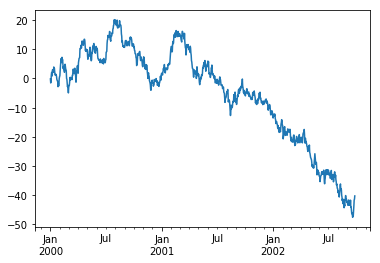

In [126]:
ts.plot()

In [185]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])

In [186]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

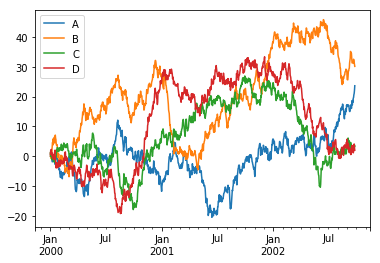

In [187]:
plt.figure(); df.plot(); plt.legend(loc='best')

In [188]:
plt.figure();

<Figure size 432x288 with 0 Axes>

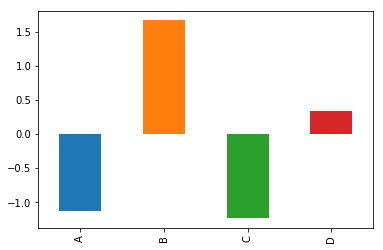

In [189]:
df.iloc[5].plot(kind='bar');

In [190]:
plt.figure();

<Figure size 432x288 with 0 Axes>

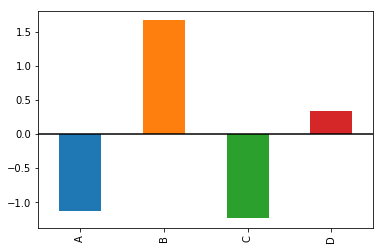

In [191]:
df.iloc[5].plot.bar(); plt.axhline(0, color='k')

In [192]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

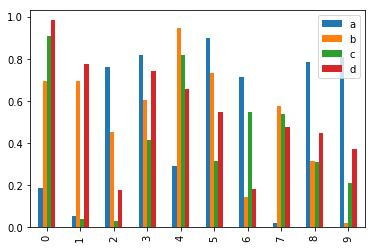

In [193]:
df2.plot.bar();

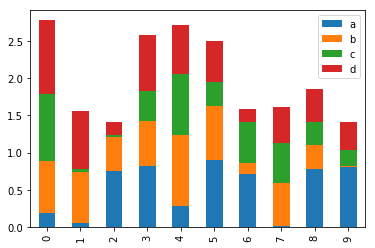

In [194]:
df2.plot.bar(stacked=True);

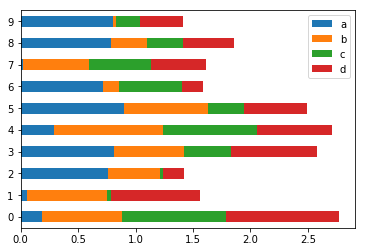

In [195]:
df2.plot.barh(stacked=True);

In [196]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
   ....:                     'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

In [197]:
plt.figure();

<Figure size 432x288 with 0 Axes>

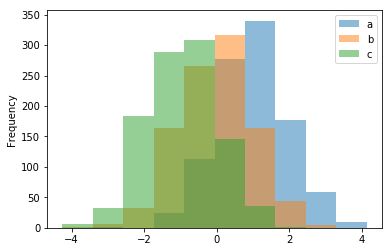

In [198]:
df4.plot.hist(alpha=0.5)

In [199]:
plt.figure();

<Figure size 432x288 with 0 Axes>

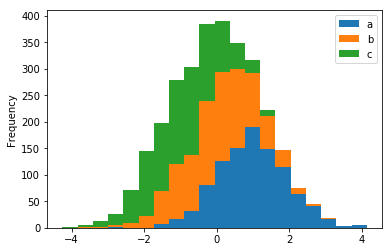

In [200]:
df4.plot.hist(stacked=True, bins=20)

In [201]:
plt.figure();

<Figure size 432x288 with 0 Axes>

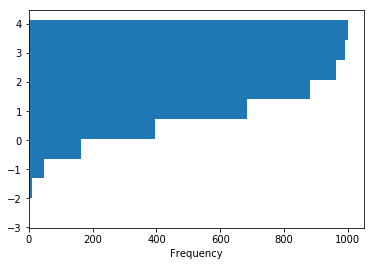

In [202]:
df4['a'].plot.hist(orientation='horizontal', cumulative=True)

# Getting Data In/Out

In [130]:
df.to_csv('foo.csv')

In [131]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.052675,-1.079745,-0.429653,1.068676
1,2000-01-02,-1.204335,-1.577764,-0.314006,-0.628149
2,2000-01-03,-0.397834,-3.155066,-0.170463,-2.294329
3,2000-01-04,-1.208545,-3.584160,0.036680,-2.581253
4,2000-01-05,0.854216,-3.918904,-0.014121,-2.977005
5,2000-01-06,0.794161,-4.352799,2.094510,-3.997918
6,2000-01-07,3.147353,-5.246595,0.866241,-3.763260
7,2000-01-08,3.406283,-4.686972,1.499426,-3.076550
8,2000-01-09,4.908516,-2.482148,2.552748,-3.409531
9,2000-01-10,4.691494,-1.613945,4.391728,-2.624454


In [132]:
df.to_hdf('foo.h5','df')

In [133]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-1.052675,-1.079745,-0.429653,1.068676
2000-01-02,-1.204335,-1.577764,-0.314006,-0.628149
2000-01-03,-0.397834,-3.155066,-0.170463,-2.294329
2000-01-04,-1.208545,-3.584160,0.036680,-2.581253
2000-01-05,0.854216,-3.918904,-0.014121,-2.977005
2000-01-06,0.794161,-4.352799,2.094510,-3.997918
2000-01-07,3.147353,-5.246595,0.866241,-3.763260
2000-01-08,3.406283,-4.686972,1.499426,-3.076550
2000-01-09,4.908516,-2.482148,2.552748,-3.409531
2000-01-10,4.691494,-1.613945,4.391728,-2.624454


In [134]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [135]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-1.052675,-1.079745,-0.429653,1.068676
2000-01-02,-1.204335,-1.577764,-0.314006,-0.628149
2000-01-03,-0.397834,-3.155066,-0.170463,-2.294329
2000-01-04,-1.208545,-3.584160,0.036680,-2.581253
2000-01-05,0.854216,-3.918904,-0.014121,-2.977005
2000-01-06,0.794161,-4.352799,2.094510,-3.997918
2000-01-07,3.147353,-5.246595,0.866241,-3.763260
2000-01-08,3.406283,-4.686972,1.499426,-3.076550
2000-01-09,4.908516,-2.482148,2.552748,-3.409531
2000-01-10,4.691494,-1.613945,4.391728,-2.624454


# Gotchas

In [136]:
if pd.Series([False, True, False]):
    print("I was true")
Traceback

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Expanding

In [137]:
df = pd.DataFrame(
   ...:      {'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [138]:
df.loc[df.AAA >= 5,'BBB'] = -1
df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


In [139]:
df.loc[df.AAA >= 5,['BBB','CCC']] = 555
df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


In [140]:
df.loc[df.AAA < 5,['BBB','CCC']] = 2000
df

,AAA,BBB,CCC
0,4,2000,2000
1,5,555,555
2,6,555,555
3,7,555,555


In [141]:
df_mask = pd.DataFrame({'AAA' : [True] * 4, 'BBB' : [False] * 4,'CCC' : [True,False] * 2})

In [142]:
df_mask

,AAA,BBB,CCC
0,True,False,True
1,True,False,False
2,True,False,True
3,True,False,False


In [143]:
df.where(df_mask,-1000)

,AAA,BBB,CCC
0,4,-1000,2000
1,5,-1000,-1000
2,6,-1000,555
3,7,-1000,-1000


In [144]:
df = pd.DataFrame(
   ...:      {'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [145]:
df['logic'] = np.where(df['AAA'] > 5,'high','low')
df

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,20,50,low
2,6,30,-30,high
3,7,40,-50,high


In [146]:
df = pd.DataFrame(
   ...:      {'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [147]:
dflow = df[df.AAA <= 5]; dflow

,AAA,BBB,CCC
0,4,10,100
1,5,20,50


In [148]:
dfhigh = df[df.AAA > 5]; dfhigh

,AAA,BBB,CCC
2,6,30,-30
3,7,40,-50


In [149]:
df = pd.DataFrame(
   ....:      {'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [150]:
newseries = df.loc[(df['BBB'] < 25) & (df['CCC'] >= -40), 'AAA']
newseries

0    4
1    5
Name: AAA, dtype: int64

In [151]:
newseries = df.loc[(df['BBB'] > 25) | (df['CCC'] >= -40), 'AAA']
newseries

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64

In [152]:
df.loc[(df['BBB'] > 25) | (df['CCC'] >= 75), 'AAA'] = 0.1; df

,AAA,BBB,CCC
0,0.1,10,100
1,5.0,20,50
2,0.1,30,-30
3,0.1,40,-50


In [153]:
df = pd.DataFrame(
   ....:      {'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [154]:
aValue = 43.0

In [155]:
df.loc[(df.CCC-aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


In [156]:
df = pd.DataFrame(
   ....:      {'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [157]:
Crit1 = df.AAA <= 5.5

In [158]:
Crit2 = df.BBB == 10.0

In [159]:
Crit3 = df.CCC > -40.0

In [160]:
AllCrit = Crit1 & Crit2 & Crit3

In [161]:
CritList = [Crit1,Crit2,Crit3]

In [162]:
df = pd.DataFrame(
   ....:      {'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [163]:
df[(df.AAA <= 6) & (df.index.isin([0,2,4]))]

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30


In [164]:
data = {'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}

In [165]:
df = pd.DataFrame(data=data,index=['foo','bar','boo','kar'])
df

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [166]:
df.loc['bar':'kar']

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [167]:
df.iloc[0:3]

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30


In [168]:
df.loc['bar':'kar']

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [169]:
df2 = pd.DataFrame(data=data,index=[1,2,3,4])

In [170]:
df2.iloc[1:3]

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [171]:
df2.loc[1:3]

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


In [ ]:
https://github.com/wesm/pydata-book